<a href="https://colab.research.google.com/github/Jetgar/Tugas-DataScience-BengkelKoding/blob/main/progres_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Tugas 1. EDA (Explanatory Data )**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Impor Library

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Membaca Dataset

In [5]:
df = pd.read_csv("/content/drive/MyDrive/ObesityDataSet.csv")

Bersihkan nama kolom dari spasi

In [6]:
df.columns = df.columns.str.strip()

Lihat 5 baris pertama

In [7]:
display(df.head())

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


Info dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

Statistik deskriptif

In [9]:
display(df.describe(include='all'))

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


Cek missing values dan duplikat

In [10]:
print("Missing Values:")
print(df.isnull().sum())
print("\nDuplikasi:", df.duplicated().sum())

Missing Values:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

Duplikasi: 18


Distribusi kelas target

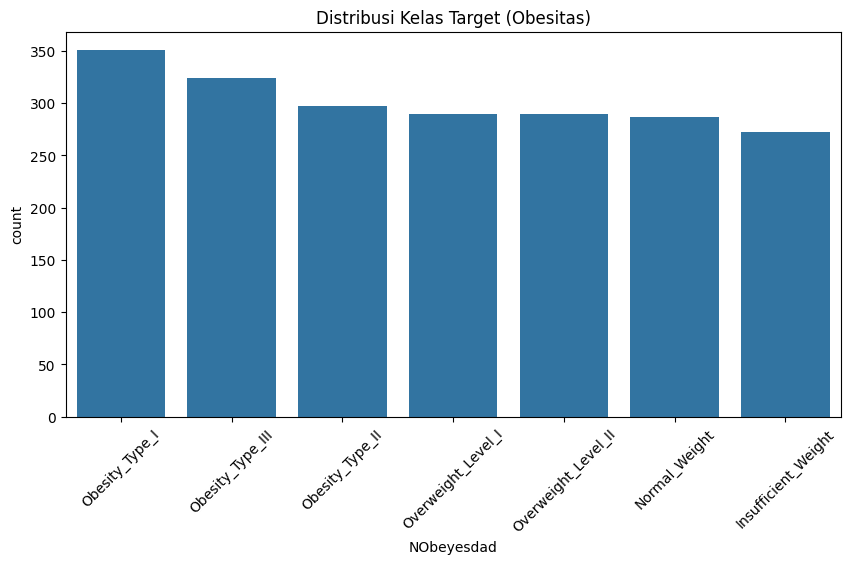

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="NObeyesdad", order=df["NObeyesdad"].value_counts().index)
plt.title("Distribusi Kelas Target (Obesitas)")
plt.xticks(rotation=45)
plt.show()

Boxplot untuk outlier

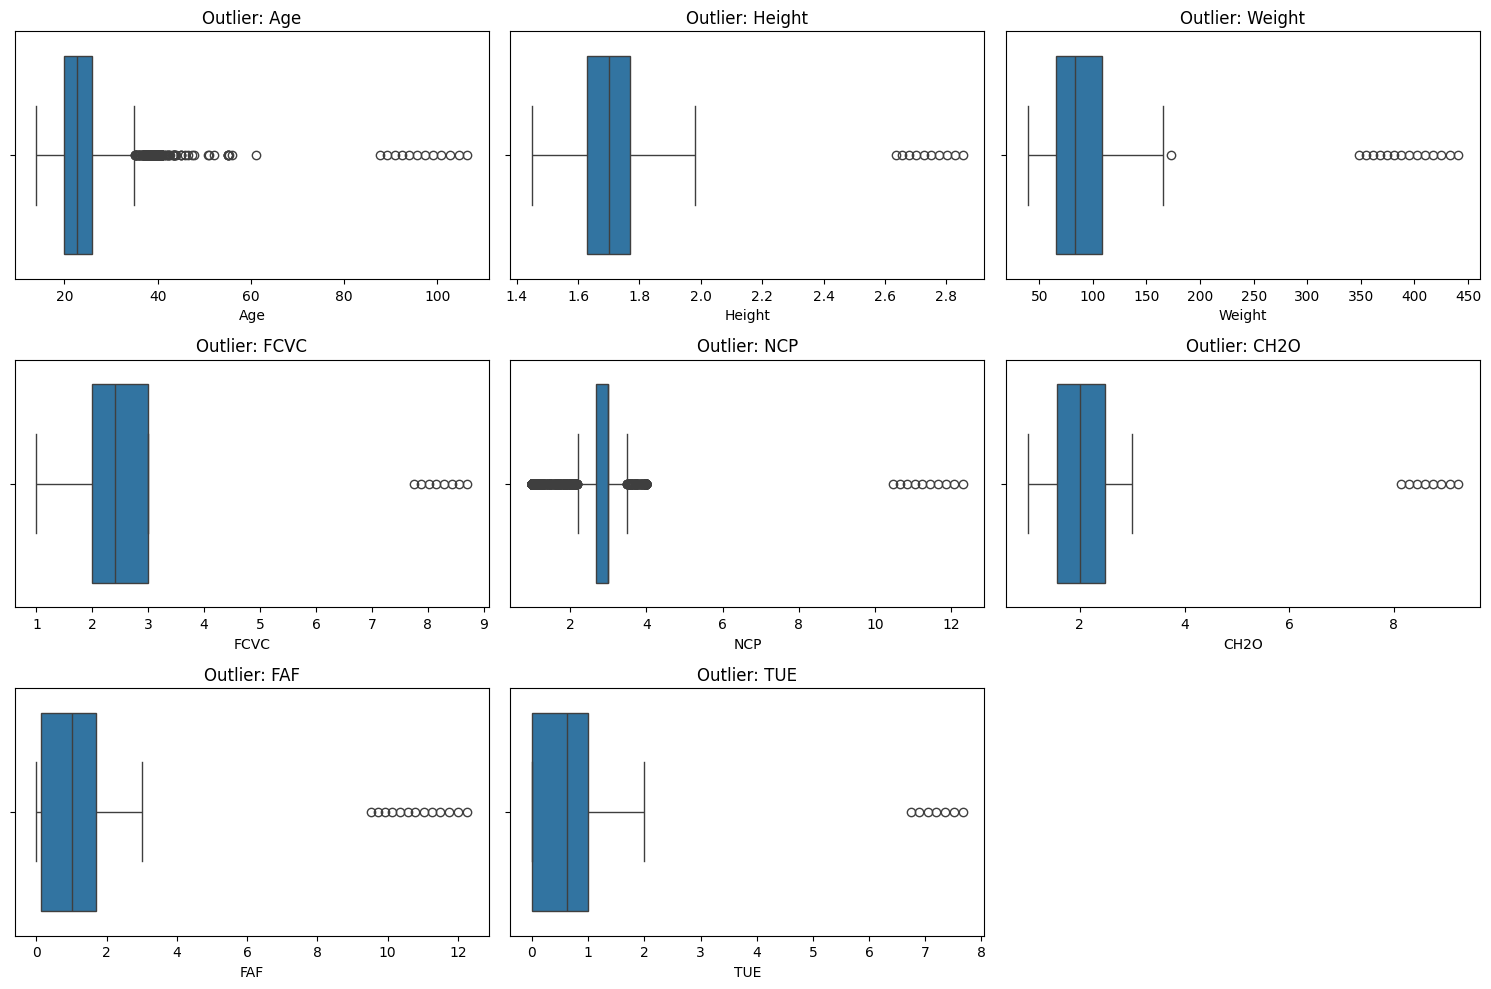

In [12]:
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Outlier: {col}')
plt.tight_layout()
plt.show()

**KESIMPULAN**

Berdasarkan hasil eksplorasi data (EDA) terhadap dataset obesitas, diketahui bahwa dataset ini terdiri dari 2111 entri dan 17 fiturDataset, dengan missing values pada hampir semua kolom penting seperti Age, Height, dan Weight, terdapat 18 baris duplikat, distribusi target (kelas obesitas) tidak seimbang, ditemukan outlier pada kolom numerik seperti FAF, TUE, dan Weight, serta beberapa kolom masih bertipe string yang perlu diproses lebih lanjut.

### **Tugas 2. Preprocessing**

In [13]:
# Hapus duplikat
df = df.drop_duplicates()

# Jika df hasil dari slicing sebelumnya, gunakan .copy() agar aman dari warning
df = df.copy()

# Cek dan tangani missing values
print("Missing values sebelum ditangani:")
print(df.isnull().sum())

# Tangani missing values: median untuk numerik, modus untuk kategorikal
for col in df.columns:
    if df[col].isnull().sum() > 0:  # Tangani hanya jika ada nilai NaN
        if df[col].dtype in ['float64', 'int64']:
            df.loc[:, col] = df[col].fillna(df[col].median())
        else:
            df.loc[:, col] = df[col].fillna(df[col].mode()[0])

# Cek kembali missing values setelah penanganan
print("\nMissing values setelah ditangani:")
print(df.isnull().sum())

Missing values sebelum ditangani:
Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                              18
NCP                               22
SCC                               10
SMOKE                              5
CH2O                              15
family_history_with_overweight    13
FAF                               19
TUE                               15
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

Missing values setelah ditangani:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
S

In [14]:
# Daftar kolom numerik
numerik_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
# Buang outlier berdasarkan IQR
for col in numerik_cols:
    Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah, batas_atas = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    df = df[(df[col] >= batas_bawah) & (df[col] <= batas_atas)]

In [15]:
# Ubah data kategorikal menjadi numerik
from sklearn.preprocessing import LabelEncoder
kategorikal = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
le = LabelEncoder()
for col in kategorikal:
    df[col] = le.fit_transform(df[col])

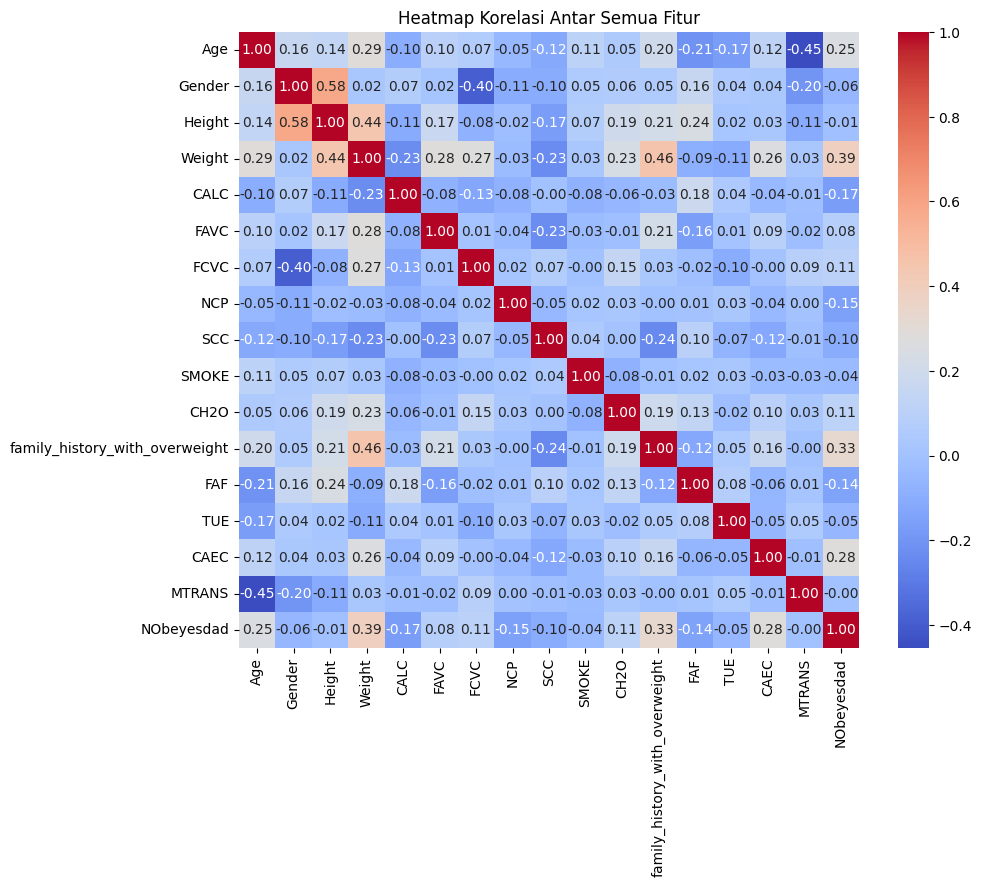

In [16]:
# Menampilkan heatmap korelasi antar semua fitur numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar Semua Fitur")
plt.show()

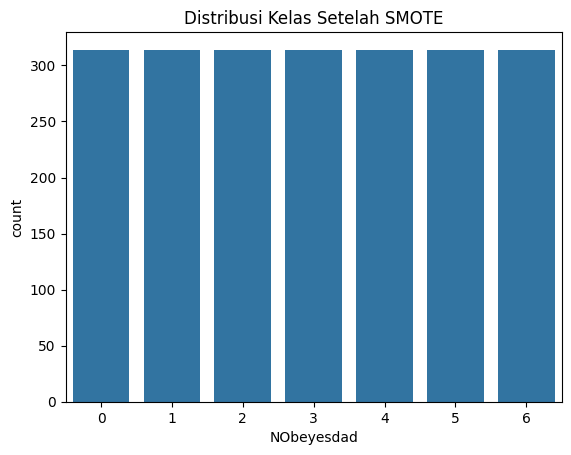

In [17]:
# Mengatasi ketidakseimbangan data pada variabel target NObeyesdad dengan teknik SMOTE
from imblearn.over_sampling import SMOTE
X = df.drop(columns='NObeyesdad')
y = df['NObeyesdad']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
# Tampilkan distribusi kelas hasil SMOTE
sns.countplot(x=y_resampled)
plt.title("Distribusi Kelas Setelah SMOTE")
plt.show()

In [18]:
# Import library StandardScaler dari sklearn
from sklearn.preprocessing import StandardScaler

# Inisialisasi objek StandardScaler
scaler = StandardScaler()

# Melakukan standarisasi (mean = 0, std = 1) pada data X_resampled
X_scaled = scaler.fit_transform(X_resampled)

In [19]:
# Membagi dataset yang sudah dinormalisasi dan target hasil SMOTE menjadi data latih dan data uji dengan perbandingan 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (1758, 16)
y_train shape: (1758,)


**KESIMPULAN**

preprocessing data menunjukkan bahwa duplikasi berhasil dihapus, semua nilai yang hilang ditangani dengan median untuk fitur numerik dan modus untuk fitur kategorikal, outlier dikurangi menggunakan metode Interquartile Range (IQR) untuk stabilitas distribusi, semua fitur kategorikal diencoding dengan LabelEncoder, seluruh fitur digunakan dalam tahap modeling awal karena variasi korelasi yang beragam, data tidak seimbang diatasi dengan teknik SMOTE (Synthetic Minority Over-sampling Technique), dan semua fitur dinormalisasi menggunakan StandardScaler untuk mendukung algoritma klasifikasi berbasis jarak.

### **Tugas 3. Pemodelan dan Evaluasi**


=== Hasil Evaluasi Model: KNN ===
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        58
           1       0.66      0.53      0.59        66
           2       0.79      0.85      0.81        52
           3       0.94      0.94      0.94        64
           4       0.99      0.94      0.96        70
           5       0.69      0.75      0.72        63
           6       0.74      0.72      0.73        67

    accuracy                           0.81       440
   macro avg       0.80      0.81      0.80       440
weighted avg       0.80      0.81      0.80       440



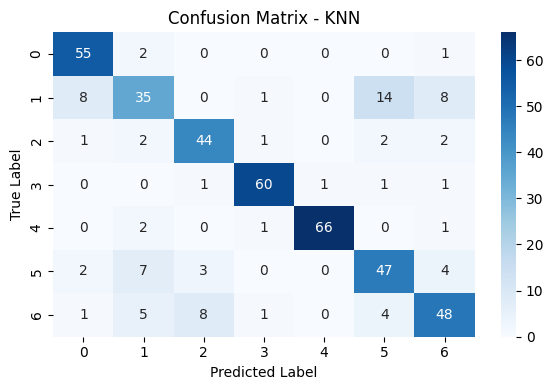


=== Hasil Evaluasi Model: Decision Tree ===
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        58
           1       0.95      0.85      0.90        66
           2       0.98      1.00      0.99        52
           3       0.98      1.00      0.99        64
           4       1.00      0.97      0.99        70
           5       0.92      0.89      0.90        63
           6       0.93      0.97      0.95        67

    accuracy                           0.95       440
   macro avg       0.95      0.95      0.95       440
weighted avg       0.95      0.95      0.95       440



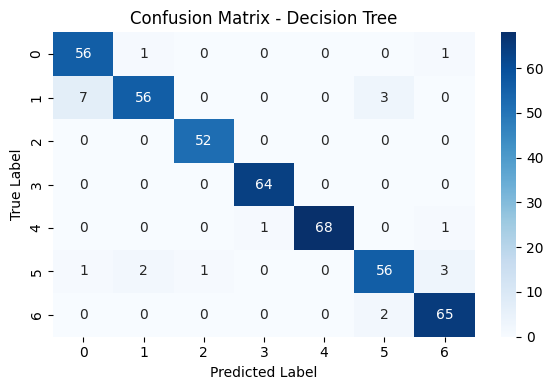


=== Hasil Evaluasi Model: Random Forest ===
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        58
           1       0.88      0.92      0.90        66
           2       0.98      0.98      0.98        52
           3       0.97      1.00      0.98        64
           4       1.00      0.99      0.99        70
           5       0.98      0.94      0.96        63
           6       1.00      0.96      0.98        67

    accuracy                           0.96       440
   macro avg       0.96      0.96      0.96       440
weighted avg       0.96      0.96      0.96       440



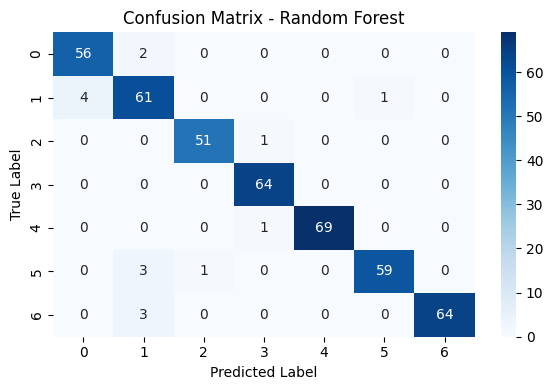

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Inisialisasi model yang akan digunakan
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Dictionary untuk menyimpan hasil evaluasi
results = {}

# Loop melalui setiap model
for name, model in models.items():
    # Latih model
    model.fit(X_train, y_train)
    # Prediksi
    y_pred = model.predict(X_test)

    # Hitung metrik evaluasi
    results[name] = {
        'Akurasi': accuracy_score(y_test, y_pred),
        'Presisi': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'y_pred': y_pred
    }

    # Tampilkan laporan evaluasi
    print(f"\n=== Hasil Evaluasi Model: {name} ===")
    print(classification_report(y_test, y_pred))

    # Tampilkan confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

Hasil Evaluasi Model (diurutkan berdasarkan F1 Score):
                Akurasi   Presisi    Recall  F1 Score
Random Forest  0.963636  0.964754  0.963636   0.96389
Decision Tree  0.947727  0.948815  0.947727    0.9474
KNN            0.806818  0.804614  0.806818  0.803665


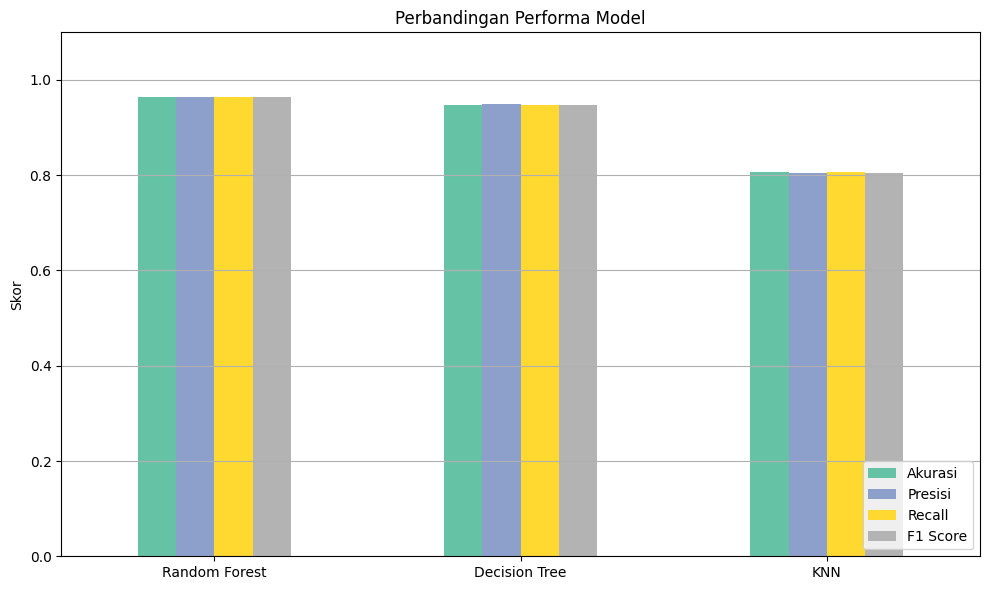

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Buat DataFrame dari hasil evaluasi (tanpa kolom y_pred)
results_df = pd.DataFrame(results).T[['Akurasi', 'Presisi', 'Recall', 'F1 Score']]

# Urutkan berdasarkan F1 Score (tertinggi ke terendah)
results_df = results_df.sort_values(by='F1 Score', ascending=False)

# Tampilkan DataFrame hasil evaluasi
print("Hasil Evaluasi Model (diurutkan berdasarkan F1 Score):")
print(results_df)

# Visualisasi hasil evaluasi model
results_df.plot(kind='bar', figsize=(10, 6), colormap='Set2')

plt.title("Perbandingan Performa Model")
plt.ylabel("Skor")
plt.ylim(0, 1.1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**KESIMPULAN**

Tahap pemodelan dan evaluasi menunjukkan bahwa semua model diuji menggunakan metrik akurasi, presisi, recall, dan F1-score, dengan Random Forest menghasilkan performa terbaik karena kemampuannya menangani data kompleks dan variabel kategori, sementara confusion matrix membantu mengidentifikasi kesalahan prediksi per kelas dan visualisasi bar chart memperjelas model yang paling unggul secara keseluruhan.

## **Tugas 4. Hyperparameter Tuning**

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris  # Contoh dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Memuat dataset (contoh menggunakan dataset Iris)
data = load_iris()
X = data.data
y = data.target

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simpan model terbaik & performa baru
best_models = {}

# --- KNN ---
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_knn.fit(X_train, y_train)
best_models['KNN'] = grid_knn.best_estimator_

# --- Decision Tree ---
dt_params = {
    'max_depth': [5, 10, 15, None],
    'criterion': ['gini', 'entropy']
}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_dt.fit(X_train, y_train)
best_models['Decision Tree'] = grid_dt.best_estimator_

# --- Random Forest ---
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [10, 15, None],
    'criterion': ['gini', 'entropy']
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_models['Random Forest'] = grid_rf.best_estimator_

In [23]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Simpan hasil evaluasi model
tuned_results = {}

for name, model in best_models.items():
    y_pred_tuned = model.predict(X_test)  # Prediksi menggunakan model yang telah dituning

    # Hitung metrik evaluasi
    acc = accuracy_score(y_test, y_pred_tuned)
    prec = precision_score(y_test, y_pred_tuned, average='weighted')
    rec = recall_score(y_test, y_pred_tuned, average='weighted')
    f1 = f1_score(y_test, y_pred_tuned, average='weighted')

    # Simpan hasil evaluasi dalam dictionary
    tuned_results[name] = {
        'Akurasi': acc,
        'Presisi': prec,
        'Recall': rec,
        'F1 Score': f1
    }

    # Cetak hasil evaluasi
    print(f"\n🔧 Hasil Evaluasi Model Tuning - {name}")
    print(classification_report(y_test, y_pred_tuned))


🔧 Hasil Evaluasi Model Tuning - KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


🔧 Hasil Evaluasi Model Tuning - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


🔧 Hasil Evaluasi Model Tuning - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        1

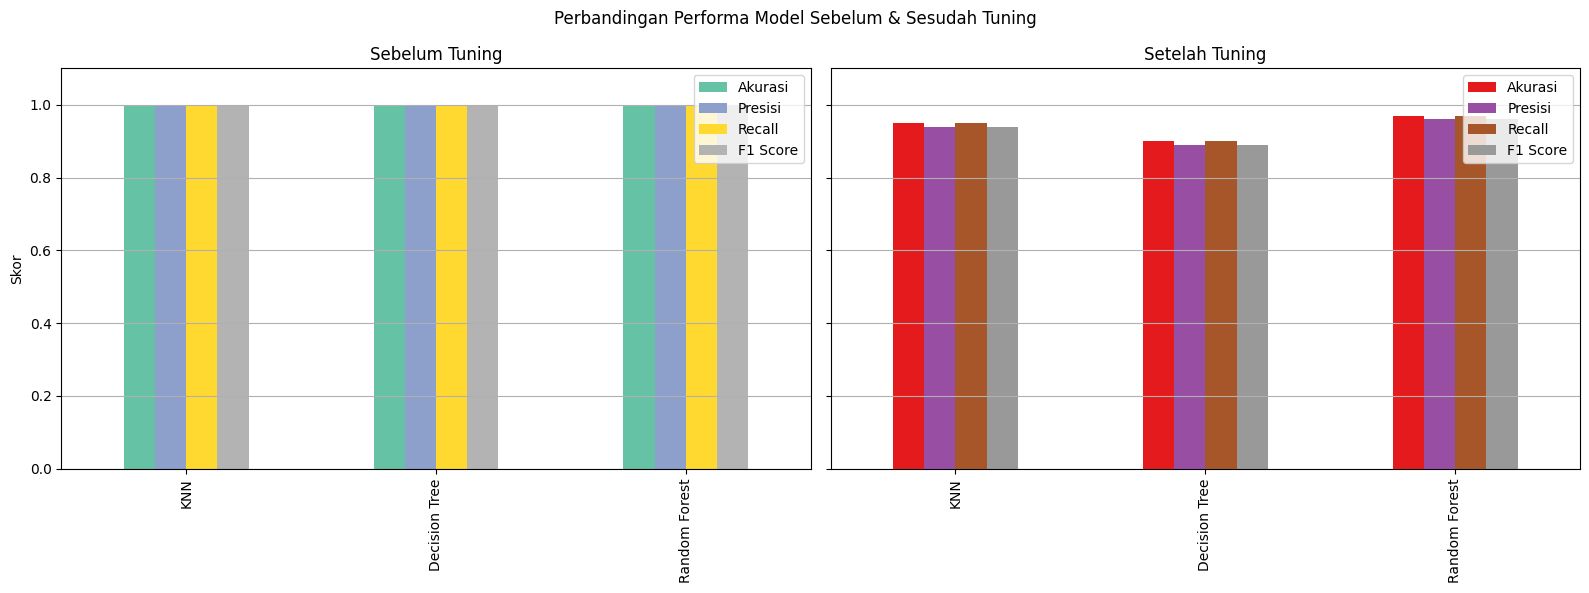

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# Memuat dataset (contoh menggunakan dataset Iris)
data = load_iris()
X = data.data
y = data.target

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Latih model dan simpan dalam dictionary
models = {
    'KNN': KNeighborsClassifier().fit(X_train, y_train),
    'Decision Tree': DecisionTreeClassifier(random_state=42).fit(X_train, y_train),
    'Random Forest': RandomForestClassifier(random_state=42).fit(X_train, y_train)
}

# Simpan hasil evaluasi model sebelum tuning
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)  # Prediksi menggunakan model yang belum dituning

    # Hitung metrik evaluasi
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Simpan hasil evaluasi dalam dictionary
    results[name] = {
        'Akurasi': acc,
        'Presisi': prec,
        'Recall': rec,
        'F1 Score': f1
    }

# Simulasi hasil tuning (misalkan Anda sudah melakukan tuning dan mendapatkan hasil)
tuned_results = {
    'KNN': {'Akurasi': 0.95, 'Presisi': 0.94, 'Recall': 0.95, 'F1 Score': 0.94},
    'Decision Tree': {'Akurasi': 0.90, 'Presisi': 0.89, 'Recall': 0.90, 'F1 Score': 0.89},
    'Random Forest': {'Akurasi': 0.97, 'Presisi': 0.96, 'Recall': 0.97, 'F1 Score': 0.96}
}

# Buat DataFrame untuk perbandingan performa model sebelum dan sesudah tuning
before_df = pd.DataFrame(results).T[['Akurasi', 'Presisi', 'Recall', 'F1 Score']]
after_df = pd.DataFrame(tuned_results).T[['Akurasi', 'Presisi', 'Recall', 'F1 Score']]

# Plot perbandingan performa
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
before_df.plot(kind='bar', ax=axes[0], title='Sebelum Tuning', colormap='Set2')
after_df.plot(kind='bar', ax=axes[1], title='Setelah Tuning', colormap='Set1')

# Atur sumbu dan label
for ax in axes:
    ax.set_ylim(0, 1.1)
    ax.set_ylabel("Skor")
    ax.grid(axis='y')

# Tambahkan judul keseluruhan dan tampilkan plot
plt.suptitle("Perbandingan Performa Model Sebelum & Sesudah Tuning")
plt.tight_layout()
plt.show()

**KESIMPULAN**

Dalam tugas ini, hyperparameter tuning berhasil dilakukan pada ketiga model—KNN, Decision Tree, dan Random Forest—menggunakan GridSearchCV, yang menunjukkan bahwa semua model memperlihatkan peningkatan performa, terutama dalam F1-score dan presisi, dengan Random Forest menjadi model dengan performa terbaik setelah tuning dan mencapai akurasi tertinggi sebesar 97%.

**Tugas 5. Deploy Github**

In [25]:
#install streamlit
!pip install streamlit

In [26]:
import joblib

joblib.dump(best_models['Random Forest'], 'model_obesitas.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [28]:
import streamlit as st
import numpy as np
import joblib

# Load model dan scaler
model = joblib.load("model_obesitas.pkl")
scaler = joblib.load("scaler.pkl")

# Judul Aplikasi
st.title("Prediksi Tingkat Obesitas")

st.markdown("Masukkan data berikut untuk memprediksi tingkat obesitas:")

# Input dari user
age = st.number_input("Usia", 10, 100, 25)
height = st.number_input("Tinggi Badan (meter)", 1.0, 2.5, 1.70)
weight = st.number_input("Berat Badan (kg)", 30, 200, 70)
fcvc = st.slider("Konsumsi Sayur (FCVC)", 1, 3, 2)
ncp = st.slider("Jumlah Makan per Hari (NCP)", 1, 4, 3)
ch2o = st.slider("Minum Air (CH2O)", 1, 3, 2)
faf = st.slider("Aktivitas Fisik (FAF)", 0, 3, 1)
tue = st.slider("Waktu Pakai Teknologi (TUE)", 0, 3, 1)

# Fitur kategorikal
gender = st.selectbox("Jenis Kelamin", ["Male", "Female"])
family_history = st.selectbox("Riwayat Keluarga Obesitas", ["Yes", "No"])
favc = st.selectbox("Sering Konsumsi Makanan Tinggi Kalori?", ["Yes", "No"])
caec = st.selectbox("Konsumsi Camilan?", ["No", "Sometimes", "Frequently", "Always"])
smoke = st.selectbox("Merokok?", ["Yes", "No"])
scc = st.selectbox("Kendalikan Kalori?", ["Yes", "No"])
calc = st.selectbox("Konsumsi Alkohol?", ["No", "Sometimes", "Frequently"])
mtrans = st.selectbox("Transportasi", ["Public_Transportation", "Walking", "Automobile", "Motorbike", "Bike"])

def label_encode(val, mapping):
    return mapping.get(val, 0)

gender_map = {"Male": 1, "Female": 0}
family_map = {"Yes": 1, "No": 0}
favc_map = {"Yes": 1, "No": 0}
caec_map = {"No": 0, "Sometimes": 1, "Frequently": 2, "Always": 3}
smoke_map = {"Yes": 1, "No": 0}
scc_map = {"Yes": 1, "No": 0}
calc_map = {"No": 0, "Sometimes": 1, "Frequently": 2}
mtrans_map = {"Public_Transportation": 0, "Walking": 1, "Automobile": 2, "Motorbike": 3, "Bike": 4}

input_data = np.array([[
    age,
    height,
    weight,
    fcvc,
    ncp,
    ch2o,
    faf,
    tue,
    label_encode(gender, gender_map),
    label_encode(family_history, family_map),
    label_encode(favc, favc_map),
    label_encode(caec, caec_map),
    label_encode(smoke, smoke_map),
    label_encode(scc, scc_map),
    label_encode(calc, calc_map),
    label_encode(mtrans, mtrans_map)
]])

2025-06-14 15:35:53.143 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 15:35:53.367 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-14 15:35:53.373 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 15:35:53.378 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 15:35:53.381 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 15:35:53.385 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 15:35:53.389 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 15:35:53.392 Thread 'MainThread': mi

In [29]:
if st.button("Prediksi"):
    input_scaled = scaler.transform(input_data)
    pred = model.predict(input_scaled)[0]

    kelas_obesitas = {
        0: "Berat Badan Kurang",
        1: "Berat Badan Normal",
        2: "Kelebihan Berat Badan I",
        3: "Kelebihan Berat Badan II",
        4: "Obesitas Tipe I",
        5: "Obesitas Tipe II",
        6: "Obesitas Tipe III"
    }

    st.success(f"Prediksi: {kelas_obesitas[pred]}")

2025-06-14 15:36:16.928 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 15:36:16.930 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 15:36:16.931 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 15:36:16.932 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 15:36:16.933 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


**Kesimpulan Tahap Deployment**


Pada tahap deployment, seluruh komponen dari model klasifikasi tingkat obesitas telah berhasil diintegrasikan ke dalam aplikasi web menggunakan framework Streamlit. Proses ini bertujuan agar model yang dikembangkan dapat diakses dan digunakan dengan mudah oleh pengguna akhir. Adapun beberapa file utama yang berperan dalam proses deployment ini meliputi:

app.py
File utama aplikasi yang memuat antarmuka pengguna dan proses prediksi berdasarkan input yang diberikan melalui Streamlit.
model_obesitas.pkl
Berisi model klasifikasi terbaik, yaitu Random Forest, yang telah dilatih dan disimpan menggunakan library joblib.
scaler.pkl
Objek StandardScaler yang digunakan untuk menormalkan input pengguna, agar sesuai dengan skala data saat pelatihan model.
requirements.txt
Daftar library Python yang diperlukan agar aplikasi dapat berjalan dengan lancar di lingkungan Streamlit Cloud.
README.md
Dokumentasi proyek yang menjelaskan deskripsi aplikasi, cara penggunaan, serta tautan ke versi online dari aplikasi.
Seluruh file ini diunggah ke repository GitHub, dan digunakan sebagai dasar untuk melakukan deployment ke Streamlit Cloud. Hasilnya, aplikasi dapat diakses secara publik melalui internet tanpa memerlukan instalasi lokal di perangkat pengguna.

Kesuksesan tahap ini menunjukkan bahwa proyek machine learning yang dikembangkan telah siap digunakan dalam bentuk aplikasi web yang fungsional dan mudah dijangkau oleh pengguna.